## Мартынов Виктор. ДПИ15. Домашняя работа 4.

Максимальный балл за задание - 10.

## Данные


В этой домашней работе мы будем обучать модели машинного обучения, ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

В задании мы будем оценивать качество моделей с помощью метрики AUC-ROC.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать:

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('data.adult.csv')

# Вывод первых 5 строк
print(data.head())

   age  workclass  fnlwgt     education  education-num      marital-status  \
0   34  Local-gov  284843       HS-grad              9       Never-married   
1   40    Private  190290  Some-college             10            Divorced   
2   36  Local-gov  177858     Bachelors             13  Married-civ-spouse   
3   22    Private  184756  Some-college             10       Never-married   
4   47    Private  149700     Bachelors             13  Married-civ-spouse   

        occupation   relationship   race     sex  capital-gain  capital-loss  \
0  Farming-fishing  Not-in-family  Black    Male           594             0   
1            Sales  Not-in-family  White    Male             0             0   
2   Prof-specialty      Own-child  White    Male             0             0   
3            Sales      Own-child  White  Female             0             0   
4     Tech-support        Husband  White    Male         15024             0   

   hours-per-week >50K,<=50K  
0              60  

Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

**Задание 1 (0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [ ]:
import pandas as pd

# Замена символа "?" на NaN для удобства работы с пропусками
data.replace("?", pd.NA, inplace=True)

# Поиск признаков с пропущенными значениями
missing_columns = data.columns[data.isnull().any()].tolist()  # Получаем список колонок с NaN
print("Признаки с пропущенными значениями:", missing_columns)

# Удаляем строки, где есть хотя бы одно NaN значение
data_cleaned = data.dropna()

# Проверка, остались ли пропуски после удаления
remaining_missing = data_cleaned.isnull().sum()
print("Количество оставшихся пропусков в каждом признаке после удаления:")
print(remaining_missing)

# Выводим размерность исходного и очищенного набора данных для сравнения
print("Размерность исходного набора данных:", data.shape)
print("Размерность очищенного набора данных:", data_cleaned.shape)


Признаки с пропущенными значениями: ['workclass', 'occupation']
Количество оставшихся пропусков в каждом признаке после удаления:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64
Размерность исходного набора данных: (16280, 14)
Размерность очищенного набора данных: (15347, 14)


Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем:

 - Выделите целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными. В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [ ]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('data.adult.csv')

# Замена символа "?" на NaN
data.replace("?", pd.NA, inplace=True)

# Удаление строк с пропусками
data.dropna(inplace=True)

# Извлекаем целевую переменную из столбца '>50K,<=50K'
target = data['>50K,<=50K']  # Сохраняем целевую переменную в отдельную переменную

# Преобразуем целевую переменную в бинарный формат
target = target.map({'>50K': 1, '<=50K': 0})  # Преобразуем в бинарный формат

# Удаляем целевую переменную из основного датасета
data.drop(columns=['>50K,<=50K'], inplace=True)

# Получаем список вещественных признаков
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Создаем новый DataFrame только с вещественными признаками
numerical_data = data[numerical_features]

# Вывод информации о целевой переменной и вещественных признаках
print("Целевая переменная (первые 5 значений):")
print(target.head())

print("\nВещественные признаки:")
print(numerical_data.head())

print("\nСписок вещественных признаков:", numerical_features)


Целевая переменная (первые 5 значений):
0    0
1    0
2    0
3    0
4    1
Name: >50K,<=50K, dtype: int64

Вещественные признаки:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   34  284843              9           594             0              60
1   40  190290             10             0             0              40
2   36  177858             13             0             0              40
3   22  184756             10             0             0              30
4   47  149700             13         15024             0              40

Список вещественных признаков: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 5 алгоритмов:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)

Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**Задание 2 (1 балл)** Для каждого из первых трех алгоритмов подберите оптимальные значения указанных гиперпараметров. Для каждого из этих алгоритмов постройте график среднего качества по кросс-валидации при заданном значении гиперпараметра, на котором также отобразите доверительный интервал [m-std, m+std], где m - среднее, std - стандартное отклонение.

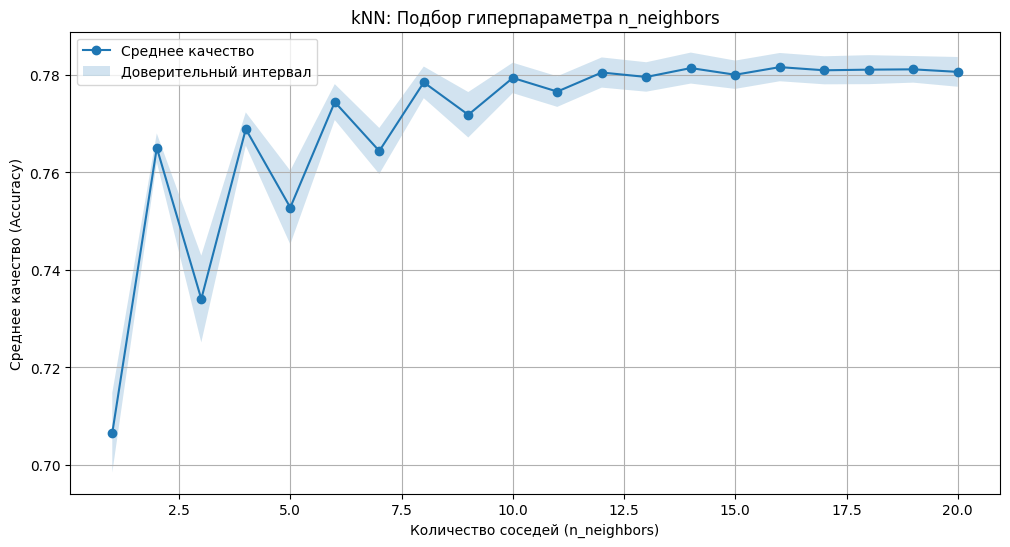

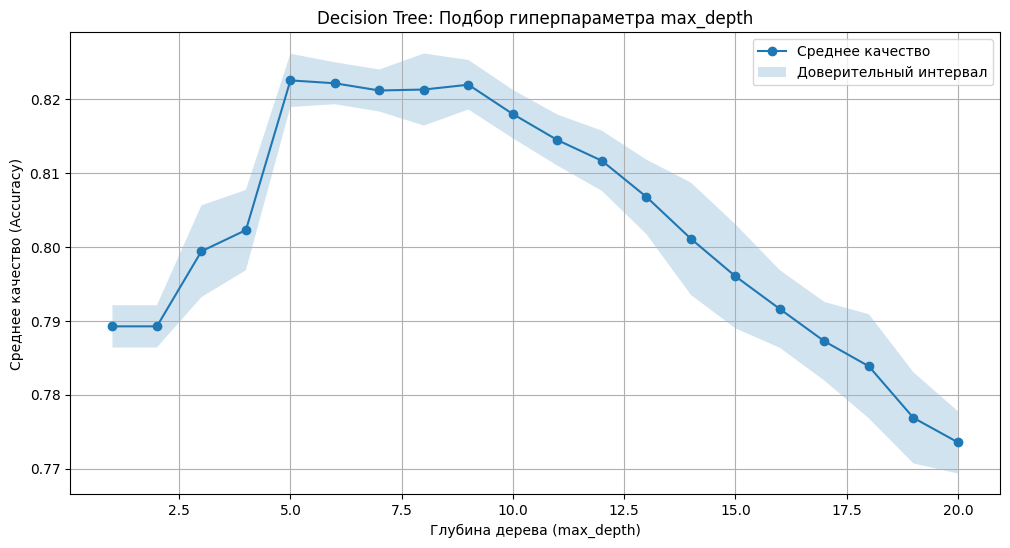

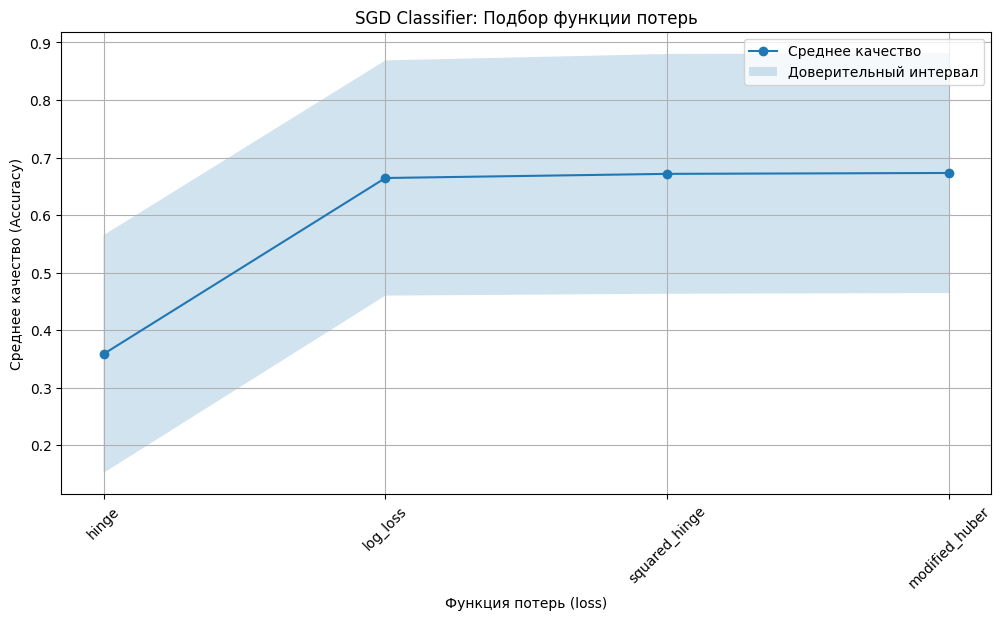

In [ ]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации данных
from sklearn.model_selection import GridSearchCV, KFold  # Импортируем классы для кросс-валидации и подбора гиперпараметров
from sklearn.neighbors import KNeighborsClassifier  # Импортируем классификатор kNN
from sklearn.tree import DecisionTreeClassifier  # Импортируем классификатор решающего дерева
from sklearn.linear_model import SGDClassifier  # Импортируем стохастический градиентный классификатор
from sklearn.metrics import accuracy_score  # Импортируем метрику точности

# Замена символа "?" на NaN для удобства работы с пропусками
data.replace("?", pd.NA, inplace=True)

# Поиск признаков с пропущенными значениями
missing_columns = data.columns[data.isnull().any()].tolist()  # Получаем список колонок с NaN

# Удаляем строки, где есть хотя бы одно NaN значение
data_cleaned = data.dropna()

# Определяем вещественные признаки и целевую переменную
X = numerical_data.values  # Признаки (вещественные) преобразуем в массив NumPy
y = target.values          # Целевая переменная преобразуется в массив NumPy

# Устанавливаем параметры для GridSearchCV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Создаем объект KFold для 5-кратной кросс-валидации



# Подбор гиперпараметров для kNN
knn_params = {'n_neighbors': range(1, 21)}  # Определяем диапазон значений для гиперпараметра n_neighbors (от 1 до 20)
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=kfold, scoring='accuracy')  # Создаем объект GridSearchCV для kNN
knn_grid.fit(X, y)  # Обучаем модель на данных

# Получаем результаты подбора гиперпараметров
knn_scores = knn_grid.cv_results_['mean_test_score']  # Средние оценки качества по кросс-валидации
knn_std = knn_grid.cv_results_['std_test_score']       # Стандартные отклонения оценок качества
knn_neighbors = knn_grid.cv_results_['param_n_neighbors'].data  # Значения гиперпараметра n_neighbors

# Визуализация результатов kNN
plt.figure(figsize=(12, 6))  # Устанавливаем размер фигуры для графика
plt.plot(knn_neighbors, knn_scores, marker='o', label='Среднее качество')  # Строим график среднего качества по n_neighbors
plt.fill_between(knn_neighbors,
                 knn_scores - knn_std,
                 knn_scores + knn_std,
                 alpha=0.2,
                 label='Доверительный интервал')  # Заполняем область между средним значением и доверительным интервалом
plt.title('kNN: Подбор гиперпараметра n_neighbors')  # Заголовок графика
plt.xlabel('Количество соседей (n_neighbors)')        # Подпись оси X
plt.ylabel('Среднее качество (Accuracy)')              # Подпись оси Y
plt.legend()                                          # Отображаем легенду на графике
plt.grid()                                           # Добавляем сетку на график
plt.show()                                           # Показываем график



# Подбор гиперпараметров для Decision Tree
dt_params = {'max_depth': range(1, 21)}  # Определяем диапазон значений для гиперпараметра max_depth (от 1 до 20)
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=kfold, scoring='accuracy')  # Создаем объект GridSearchCV для Decision Tree
dt_grid.fit(X, y)  # Обучаем модель на данных

# Получаем результаты подбора гиперпараметров
dt_scores = dt_grid.cv_results_['mean_test_score']   # Средние оценки качества по кросс-валидации
dt_std = dt_grid.cv_results_['std_test_score']        # Стандартные отклонения оценок качества
dt_depths = dt_grid.cv_results_['param_max_depth'].data  # Значения гиперпараметра max_depth

# Визуализация результатов Decision Tree
plt.figure(figsize=(12, 6))   # Устанавливаем размер фигуры для графика
plt.plot(dt_depths, dt_scores, marker='o', label='Среднее качество')   # Строим график среднего качества по max_depth
plt.fill_between(dt_depths,
                 dt_scores - dt_std,
                 dt_scores + dt_std,
                 alpha=0.2,
                 label='Доверительный интервал')   # Заполняем область между средним значением и доверительным интервалом
plt.title('Decision Tree: Подбор гиперпараметра max_depth')   # Заголовок графика
plt.xlabel('Глубина дерева (max_depth)')                       # Подпись оси X
plt.ylabel('Среднее качество (Accuracy)')                       # Подпись оси Y
plt.legend()                                                  # Отображаем легенду на графике
plt.grid()                                                   # Добавляем сетку на график
plt.show()                                                   # Показываем график



# Подбор гиперпараметров для SGD Classifier
sgd_params = {'loss': ['hinge', 'log_loss', 'squared_hinge', 'modified_huber']}  # Определяем список функций потерь для подбора гиперпараметра loss
sgd_grid = GridSearchCV(SGDClassifier(), sgd_params, cv=kfold, scoring='accuracy')   # Создаем объект GridSearchCV для SGD Classifier
sgd_grid.fit(X, y)   # Обучаем модель на данных

# Получаем результаты подбора гиперпараметров
sgd_scores = sgd_grid.cv_results_['mean_test_score']   # Средние оценки качества по кросс-валидации
sgd_std = sgd_grid.cv_results_['std_test_score']        # Стандартные отклонения оценок качества
sgd_losses = sgd_grid.cv_results_['param_loss'].data    # Значения гиперпараметра loss

# Визуализация результатов SGD Classifier
plt.figure(figsize=(12, 6))   # Устанавливаем размер фигуры для графика
plt.plot(sgd_losses, sgd_scores, marker='o', label='Среднее качество')   # Строим график среднего качества по loss
plt.fill_between(sgd_losses,
                 sgd_scores - sgd_std,
                 sgd_scores + sgd_std,
                 alpha=0.2,
                 label='Доверительный интервал')   # Заполняем область между средним значением и доверительным интервалом
plt.title('SGD Classifier: Подбор функции потерь')   # Заголовок графика
plt.xlabel('Функция потерь (loss)')                   # Подпись оси X
plt.ylabel('Среднее качество (Accuracy)')              # Подпись оси Y
plt.xticks(rotation=45)                                # Поворачиваем метки по оси X для лучшей читаемости
plt.legend()                                           # Отображаем легенду на графике
plt.grid()                                            # Добавляем сетку на график
plt.show()                                            # Показываем график


In [ ]:
"""

ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ – это диапазон значений, который, вероятно, содержит истинное значение параметра. Например, если мы говорим, что доверительный интервал для среднего значения признака age составляет 30-40 лет, это значит, что с некоторой уверенностью (обычно 95%) истинное среднее значение возрастов находится в этом диапазоне.

Примеры в алгоритмах:
В kNN доверительный интервал может указывать на вероятностный диапазон для классификации нового объекта.
В деревьях решений он может показать диапазон значений, при которых конкретный путь через дерево является достоверным.
В SGD доверительные интервалы могут применяться для оценки устойчивости параметров модели после обучения.


1. kNN (Число соседей, n_neighbors):

kNN – это алгоритм, который классифицирует новый объект, сравнивая его с k ближайшими соседями из обучающего набора данных.
Алгоритм использует метрику расстояния для нахождения ближайших соседей.
Наиболее часто используется евклидово расстояние:
sqrt{(x1 - x2)^2 + (y1 - y2)^2
где x1 и x2 – координаты объекта на плоскости по оси X, а y1 и y2 – координаты по оси Y.


График показывает зависимость точности (Accuracy) от числа соседей.
График показывает, что точность классификации растёт с увеличением числа соседей до определённого момента, затем стабилизируется и немного колеблется.
Оптимальное значение гиперпараметра n_neighbors находится примерно в диапазоне от 8 до 15, так как в этом интервале достигается стабильное высокое значение точности (около 0.78).
Доверительный интервал показывает небольшие колебания, что говорит о хорошей устойчивости модели в этом диапазоне значений n_neighbors.

2. Decision Tree (Глубина дерева, max_depth):

Дерево решений – это алгоритм, который разделяет данные на группы, используя правила, представленные в виде дерева.
Каждый узел дерева представляет правило, по которому данные делятся на две или более группы.
В каждой вершине на каждом шаге проверяем, не выполнилось ли условие останова. Если выполнилось, то
объявляем вершину листом и записываем в не предсказание.

Формула: Основная формула для дерева решений – энтропия (метрика неупорядоченности) или индекс Джини:
Энтропия = − ∑i=1 n p_i* log_⁡2(p_i)
Индекс Джини = 1 − ∑i=1 n (p_i)^2

где p_i – вероятность принадлежности элемента к классу i.

p_i – доля элементов класса i в узле дерева.

Общее описание: Алгоритм дерева решений можно представить как дерево с узлами и ветвями.
Каждый узел представляет собой вопрос о признаке данных, а каждая ветвь — ответ на этот вопрос.
В конце концов, дерево приводит к конечному решению — классификации данных.


График демонстрирует увеличение точности по мере роста глубины дерева до значения max_depth около 5, после чего точность начинает постепенно снижаться.
Оптимальная глубина дерева — около 5, так как в этой точке достигается максимальная точность (около 0.82).
С ростом глубины дерева доверительный интервал расширяется, что может указывать на переобучение модели на больших значениях max_depth.

3. SGD Classifier (Функция потерь, loss):

SGD (Stochastic Gradient Descent - стохастический градиентный спуск) – это алгоритм оптимизации, который используется для нахождения наилучших параметров модели.
Он обновляет параметры модели на основе одной случайной выборки (стохастически) из данных.

Формула: Основная формула включает градиентную функцию:
θ=θ−η⋅∇J(θ)

θ – параметры (веса), которые алгоритм пытается оптимизировать.

η – скорость обучения, показывающая насколько сильно обновляются параметры на каждом шаге.

∇J(θ) – градиент (производная), показывающий направление наибольшего изменения функции стоимости.

Общее описание: Линейный классификатор разделяет данные на классы с помощью прямой линии (в 2D).
Стохастический градиентный спуск находит наилучшую линию для разделения данных, минимизируя ошибку.


График показывает, что при использовании функции потерь log_loss достигается наибольшая точность (около 0.7), тогда как другие функции потерь (например, hinge и squared_hinge) дают более низкое качество.
Доверительный интервал для функции log_loss сравнительно узкий, что указывает на стабильность модели при этом значении гиперпараметра.
Таким образом, оптимальным выбором функции потерь для данного алгоритма является log_loss
"""

Что вы можете сказать о получившихся графиках?

**Задание 3 (0.5 балла)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

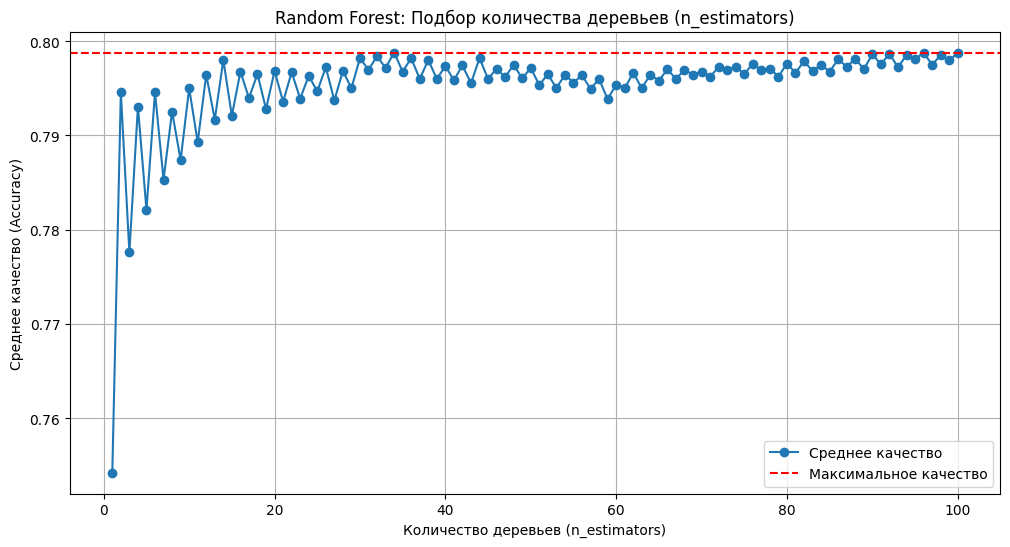

Оптимальное количество деревьев: 96, Максимальное качество: 0.7988


In [ ]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации данных
from sklearn.ensemble import RandomForestClassifier  # Импортируем классификатор Random Forest
from sklearn.model_selection import cross_val_score  # Импортируем функцию для оценки качества


# Определяем вещественные признаки и целевую переменную
X = numerical_data.values  # Признаки (вещественные) преобразуем в массив NumPy
y = target.values          # Целевая переменная преобразуется в массив NumPy



# Обучение Random Forest с большим количеством деревьев
n_estimators = 100  # Устанавливаем максимальное количество деревьев
rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)  # Создаем модель Random Forest
rf_model.fit(X, y)  # Обучаем модель на данных



# Оценка качества модели с подмножествами деревьев
# Создаем список для хранения оценок качества
scores = []

# Проверяем различные размеры подмножеств от 1 до n_estimators
for i in range(1, n_estimators + 1):
    subset_rf = RandomForestClassifier(n_estimators=i, random_state=42)  # Создаем новый экземпляр Random Forest с i деревьями
    subset_rf.estimators_ = rf_model.estimators_[:i]  # Используем первые i деревьев из уже обученной модели
    score = cross_val_score(subset_rf, X, y, cv=5, scoring='accuracy').mean()  # Оцениваем качество с помощью кросс-валидации
    scores.append(score)  # Сохраняем среднюю оценку качества



# Визуализация результатов
plt.figure(figsize=(12, 6))   # Устанавливаем размер фигуры для графика
plt.plot(range(1, n_estimators + 1), scores, marker='o', label='Среднее качество')   # Строим график среднего качества по количеству деревьев
plt.title('Random Forest: Подбор количества деревьев (n_estimators)')   # Заголовок графика
plt.xlabel('Количество деревьев (n_estimators)')                       # Подпись оси X
plt.ylabel('Среднее качество (Accuracy)')                               # Подпись оси Y
plt.axhline(y=max(scores), color='r', linestyle='--', label='Максимальное качество')  # Добавляем линию максимального качества
plt.legend()                                                          # Отображаем легенду на графике
plt.grid()                                                           # Добавляем сетку на график
plt.show()                                                           # Показываем график

# Выводим максимальное качество и соответствующее количество деревьев
optimal_n_estimators = np.argmax(scores) + 1  # Находим индекс максимального значения и добавляем 1 (индексация начинается с нуля)
optimal_score = max(scores)                     # Получаем максимальное качество
print(f'Оптимальное количество деревьев: {optimal_n_estimators}, Максимальное качество: {optimal_score:.4f}')


In [ ]:
"""
Random Forest строит множество деревьев решений и использует их для принятия окончательного решения.
Идея в том, что множество деревьев, работающих вместе, дают более точные и устойчивые результаты, чем одно дерево.

Основные шаги:
1. Создание подвыборок данных: Алгоритм создает несколько подвыборок данных из исходного набора данных. Это называется "бэггинг"

2. Построение деревьев решений: Для каждой подвыборки создается отдельное дерево решений.
При этом, на каждом этапе создания дерева выбирается случайное подмножество признаков, что позволяет деревьям быть более разнообразными.

3. Голосование деревьев: После того, как все деревья созданы, они голосуют за конечный результат.
Например, в задаче классификации каждое дерево голосует за определенный класс, и окончательный класс определяется большинством голосов.

"""

**Задание 4 (0.5 балла)** Подберём число деревьев (*n_estimators*) в алгоритме GradientBoosting. Мы знаем, что ошибка бустинга на тестовых данных, как правило, имеет U-образную форму, то есть сначала уменьшается, а при достижении некоторого числа деревьев начинает расти. Нарисуйте график ошибки в зависимости от числа деревьев. Подберите n_estimators, соответствующий минимуму ошибки.

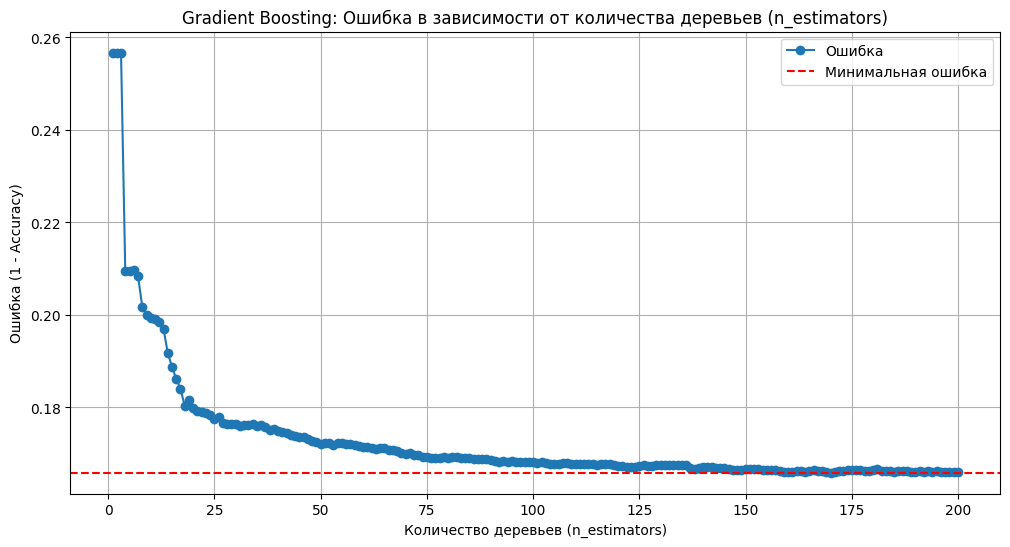

Оптимальное количество деревьев: 170, Минимальная ошибка: 0.1658


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  # Импортируем классификатор Gradient Boosting


# Определяем вещественные признаки и целевую переменную
X = numerical_data.values  # Признаки (вещественные) преобразуем в массив NumPy
y = target.values          # Целевая переменная преобразуется в массив NumPy



# Обучение модели Gradient Boosting и оценка ошибки
max_n_estimators = 200  # Устанавливаем максимальное количество деревьев для проверки
errors = []  # Список для хранения ошибок

# Проверяем различные размеры n_estimators от 1 до max_n_estimators
for n in range(1, max_n_estimators + 1):
    gb_model = GradientBoostingClassifier(n_estimators=n, random_state=42)  # Создаем модель Gradient Boosting с n деревьями
    # Оцениваем качество с помощью кросс-валидации и сохраняем среднее значение ошибки
    score = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy').mean()
    error = 1 - score  # Ошибка равна 1 минус точность
    errors.append(error)  # Сохраняем ошибку в списке



# Визуализация ошибок
plt.figure(figsize=(12, 6))   # Устанавливаем размер фигуры для графика
plt.plot(range(1, max_n_estimators + 1), errors, marker='o', label='Ошибка')   # Строим график ошибки по количеству деревьев
plt.title('Gradient Boosting: Ошибка в зависимости от количества деревьев (n_estimators)')   # Заголовок графика
plt.xlabel('Количество деревьев (n_estimators)')                       # Подпись оси X
plt.ylabel('Ошибка (1 - Accuracy)')                                   # Подпись оси Y
plt.grid()                                                           # Добавляем сетку на график
plt.axhline(y=min(errors), color='r', linestyle='--', label='Минимальная ошибка')  # Добавляем линию минимальной ошибки
plt.legend()                                                          # Отображаем легенду на графике
plt.show()                                                           # Показываем график



# Подбор оптимального n_estimators
optimal_n_estimators = np.argmin(errors) + 1  # Находим индекс минимальной ошибки и добавляем 1 (индексация начинается с нуля)
optimal_error = min(errors)                     # Получаем минимальную ошибку
print(f'Оптимальное количество деревьев: {optimal_n_estimators}, Минимальная ошибка: {optimal_error:.4f}')


In [ ]:
"""
Gradient Boosting – это алгоритм, который строит модель путем последовательного создания деревьев решений.
Каждое новое дерево исправляет ошибки, допущенные предыдущими деревьями, что позволяет модели стать более точной.

Основные шаги:
1. Инициализация модели: Начинаем с простой модели, например, с предсказанием среднего значения целевой переменной.

2. Построение последовательных деревьев: На каждом этапе строится новое дерево решений, которое предсказывает ошибки (остатки) предыдущих деревьев.
Это дерево добавляется к существующей модели, чтобы улучшить её.

3. Обновление модели: Модель обновляется, чтобы уменьшить ошибки. Новое дерево помогает уменьшить разницу между предсказанным значением и реальными данными.


Пример: Вы учитесь кататься на велике. Сначала вы едете прямо (простая модель).
Каждый раз, когда вы отклоняетесь от курса (ошибка), вы немного корректируете направление (новое дерево), чтобы оставаться на правильном пути.
С каждым этапом ваши коррекции (деревья) становятся точнее, и вы всё реже отклоняетесь от курса.
"""

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**Задание 5 (0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*. Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

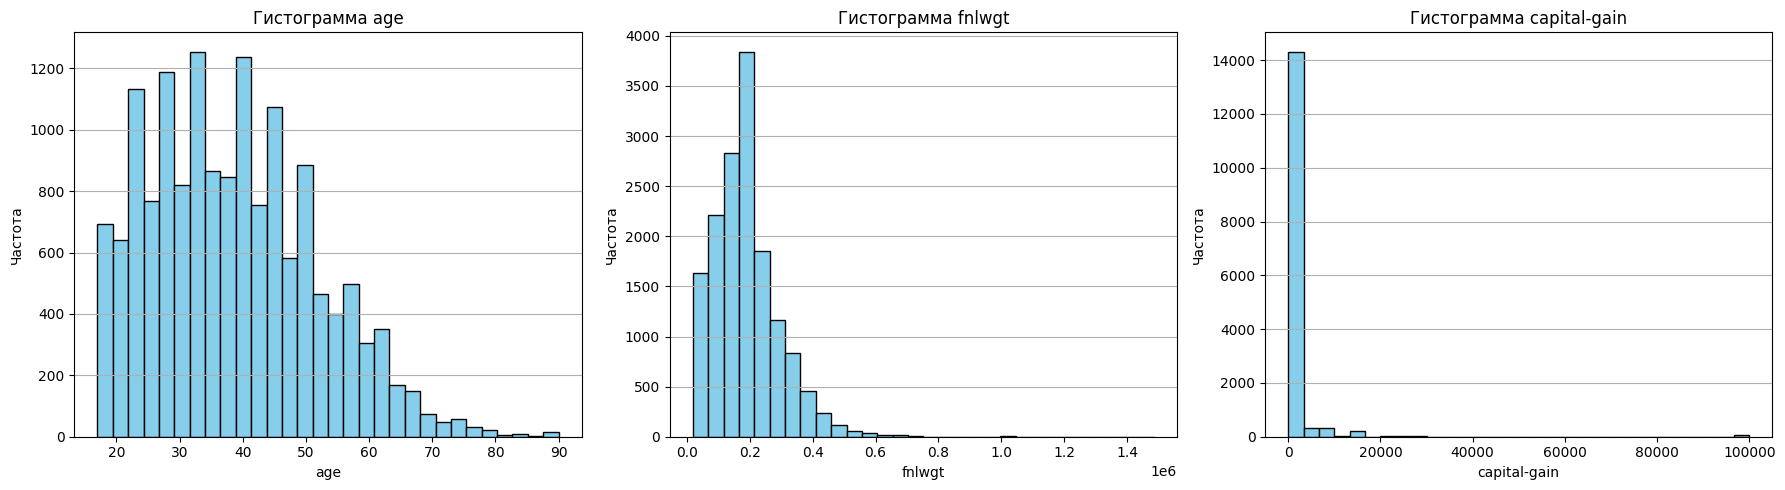

In [ ]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации данных

# age - возраст людей
# fnlwgt - показатель количества людей с аналогичными характеристиками
# capital-gain - показатель прироста капитала

# Построение гистограмм для признаков age, fnlwgt, capital-gain
features = ['age', 'fnlwgt', 'capital-gain']  # Список признаков для анализа

plt.figure(figsize=(18, 5))  # Устанавливаем размер фигуры для графиков

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)  # Создаем подграфик для каждого признака
    plt.hist(data_cleaned[feature], bins=30, color='skyblue', edgecolor='black')  # Строим гистограмму
    plt.title(f'Гистограмма {feature}')  # Заголовок графика
    plt.xlabel(feature)  # Подпись оси X
    plt.ylabel('Частота')  # Подпись оси Y
    plt.grid(axis='y')  # Добавляем сетку по оси Y

plt.tight_layout()  # Упорядочиваем графики
plt.show()  # Показываем графики


In [ ]:
"""
# age - возраст людей
# fnlwgt - показатель количества людей с аналогичными характеристиками
# capital-gain - показатель прироста капитала, например, доход от продажи акций или недвижимости

Анализ гистограмм:

AGE
Большинство людей в нашем случае находятся в возрасте от 30 до 40 лет. Очень мало людей старше 70 лет.

FNLWGT
Большинство людей имеют весовой коэффициент между 0 и 400000, но есть несколько человек с гораздо более высокими значениями.

CAPITAL-GAIN
Почти все люди не имеют прибыли от капитальных вложений (значение 0), и только у немногих людей есть высокая прибыль от их капитальных вложений.


Особенности данных:
Наши данные имеют тенденцию к скосам, особенно для признаков fnlwgt и capital-gain.

Влияние на алгоритмы:
Некоторые алгоритмы могут работать хуже с данными, где значения сильно перекошены. Это может повлиять на точность и производительность таких алгоритмов.

Влияние масштабирования:
Масштабирование (приведение данных к одному масштабу) может улучшить работу алгоритмов, сделав данные более равномерными.

"""

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Задание 6 (1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

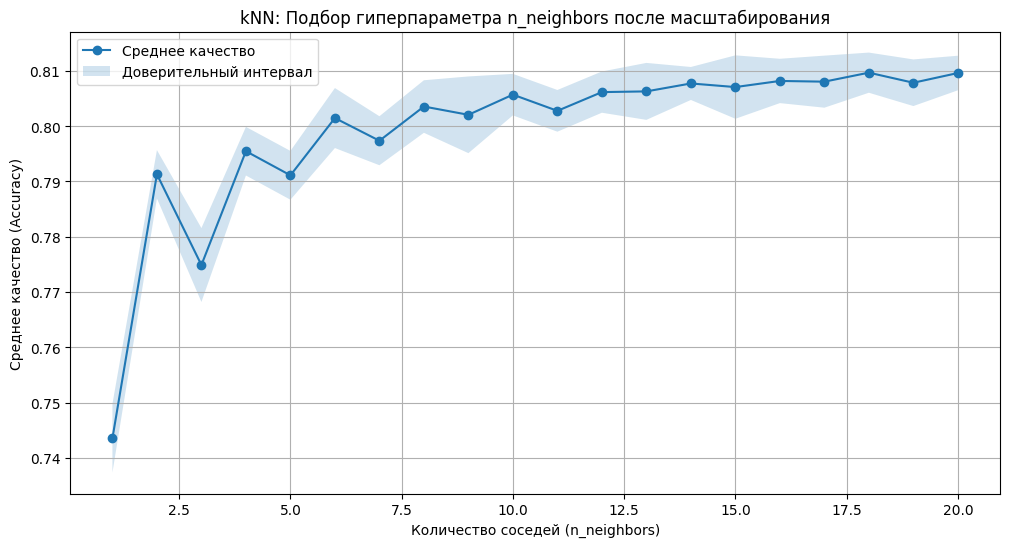

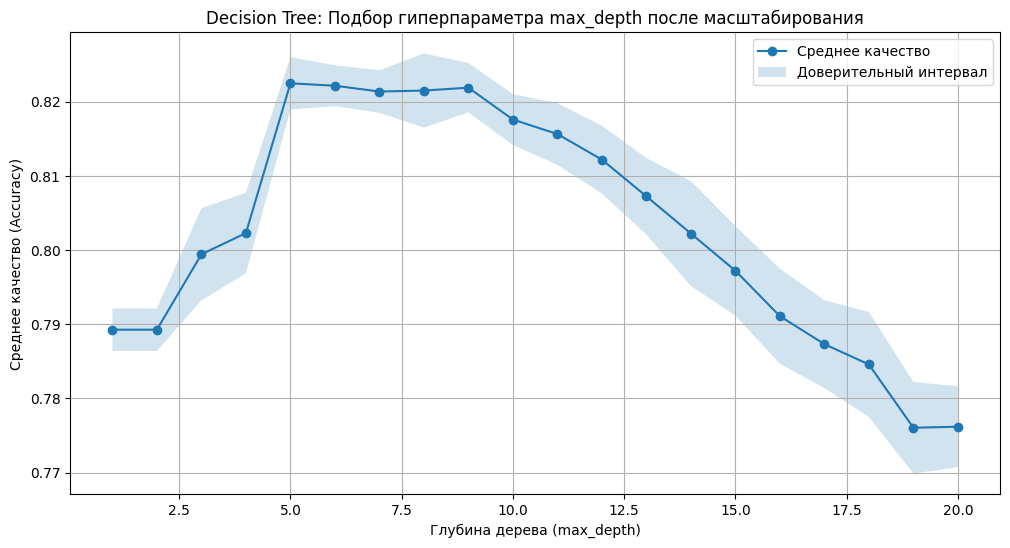

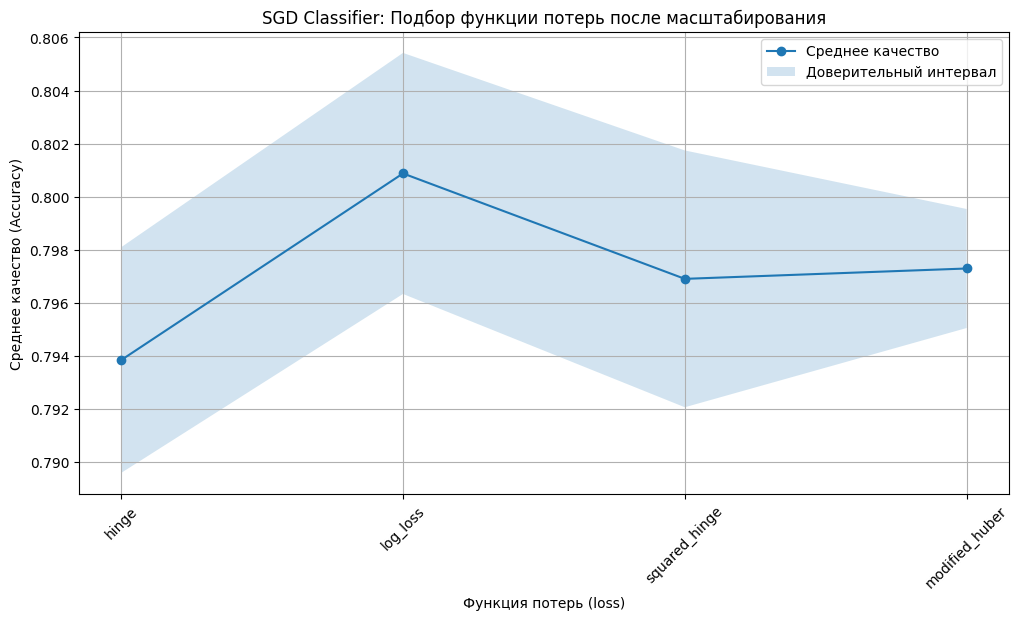

In [ ]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации данных
from sklearn.model_selection import GridSearchCV, KFold  # Импортируем классы для кросс-валидации и подбора гиперпараметров
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler для стандартизации
from sklearn.neighbors import KNeighborsClassifier  # Импортируем классификатор kNN
from sklearn.tree import DecisionTreeClassifier  # Импортируем классификатор решающего дерева
from sklearn.linear_model import SGDClassifier  # Импортируем стохастический градиентный классификатор



# Определяем вещественные признаки и целевую переменную
X = numerical_data.values  # Признаки (вещественные) преобразуем в массив NumPy
y = target.values          # Целевая переменная преобразуется в массив NumPy

# Масштабирование признаков с помощью StandardScaler
scaler = StandardScaler()  # Создаем объект StandardScaler
X_scaled = scaler.fit_transform(X)  # Масштабируем признаки

# Устанавливаем параметры для GridSearchCV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)



# Подбор гиперпараметров для kNN
knn_params = {'n_neighbors': range(1, 21)}  # Проверяем значения от 1 до 20
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=kfold, scoring='accuracy')  # Создаем объект GridSearchCV для kNN
knn_grid.fit(X_scaled, y)  # Обучаем модель на масштабированных данных

# Получаем результаты
knn_scores = knn_grid.cv_results_['mean_test_score']  # Средние оценки качества по кросс-валидации
knn_std = knn_grid.cv_results_['std_test_score']       # Стандартные отклонения оценок качества
knn_neighbors = knn_grid.cv_results_['param_n_neighbors'].data  # Значения гиперпараметра n_neighbors

# Визуализация результатов kNN
plt.figure(figsize=(12, 6))
plt.plot(knn_neighbors, knn_scores, marker='o', label='Среднее качество')
plt.fill_between(knn_neighbors,
                 knn_scores - knn_std,
                 knn_scores + knn_std,
                 alpha=0.2,
                 label='Доверительный интервал')
plt.title('kNN: Подбор гиперпараметра n_neighbors после масштабирования')
plt.xlabel('Количество соседей (n_neighbors)')
plt.ylabel('Среднее качество (Accuracy)')
plt.legend()
plt.grid()
plt.show()



# Подбор гиперпараметров для Decision Tree
dt_params = {'max_depth': range(1, 21)}  # Проверяем значения от 1 до 20
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=kfold, scoring='accuracy')  # Создаем объект GridSearchCV для Decision Tree
dt_grid.fit(X_scaled, y)  # Обучаем модель на масштабированных данных

# Получаем результаты
dt_scores = dt_grid.cv_results_['mean_test_score']
dt_std = dt_grid.cv_results_['std_test_score']
dt_depths = dt_grid.cv_results_['param_max_depth'].data



# Визуализация результатов Decision Tree
plt.figure(figsize=(12, 6))
plt.plot(dt_depths, dt_scores, marker='o', label='Среднее качество')
plt.fill_between(dt_depths,
                 dt_scores - dt_std,
                 dt_scores + dt_std,
                 alpha=0.2,
                 label='Доверительный интервал')
plt.title('Decision Tree: Подбор гиперпараметра max_depth после масштабирования')
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('Среднее качество (Accuracy)')
plt.legend()
plt.grid()
plt.show()



# Подбор гиперпараметров для SGD Classifier
sgd_params = {'loss': ['hinge', 'log_loss', 'squared_hinge', 'modified_huber']}  # Определяем список функций потерь для подбора гиперпараметра loss
sgd_grid = GridSearchCV(SGDClassifier(), sgd_params, cv=kfold, scoring='accuracy')   # Создаем объект GridSearchCV для SGD Classifier
sgd_grid.fit(X_scaled, y)   # Обучаем модель на масштабированных данных

# Получаем результаты
sgd_scores = sgd_grid.cv_results_['mean_test_score']   # Средние оценки качества по кросс-валидации
sgd_std = sgd_grid.cv_results_['std_test_score']        # Стандартные отклонения оценок качества
sgd_losses = sgd_grid.cv_results_['param_loss'].data    # Значения гиперпараметра loss



# Визуализация результатов SGD Classifier
plt.figure(figsize=(12, 6))   # Устанавливаем размер фигуры для графика
plt.plot(sgd_losses, sgd_scores, marker='o', label='Среднее качество')   # Строим график среднего качества по loss
plt.fill_between(sgd_losses,
                 sgd_scores - sgd_std,
                 sgd_scores + sgd_std,
                 alpha=0.2,
                 label='Доверительный интервал')   # Заполняем область между средним значением и доверительным интервалом
plt.title('SGD Classifier: Подбор функции потерь после масштабирования')   # Заголовок графика
plt.xlabel('Функция потерь (loss)')                   # Подпись оси X
plt.ylabel('Среднее качество (Accuracy)')              # Подпись оси Y
plt.xticks(rotation=45)                                # Поворачиваем метки по оси X для лучшей читаемости
plt.legend()                                           # Отображаем легенду на графике
plt.grid()                                            # Добавляем сетку на график
plt.show()                                            # Показываем график



In [ ]:
"""

StandardScaler – это инструмент, который используется для масштабирования данных.
Его основная задача – стандартизировать признаки, то есть приводить их к одному масштабу, чтобы они имели среднее значение 0 и стандартное отклонение 1.
Как это работает:
1) Для каждого признака (например, возраст, доход) StandardScaler вычисляет среднее значение и стандартное отклонение.
2) Затем он преобразует каждый признак, чтобы среднее значение стало 0, а стандартное отклонение – 1, по следующей формуле:

Xnew=(X−μ)/σ

где:
X – исходное значение признака,
μ – среднее значение признака,
σ – стандартное отклонение признака.


Анализ результатов масштабирования:

1. kNN (Число соседей, n_neighbor):

После масштабирования качество модели заметно улучшилось. Средняя точность возросла с примерно 0.78 до около 0.81–0.82.
Доверительные интервалы стали более узкими, что говорит о повышении стабильности модели. Это подтверждает, что kNN чувствителен к масштабированию признаков, поскольку он основан на расстояниях между объектами.
Масштабирование значительно улучшило работу алгоритма, и теперь оптимальный диапазон для n_neighbors составляет от 8 до 15, как и ранее, но теперь с более высоким уровнем точности.

2. Decision Tree (Глубина дерева, max_depth):

Для дерева решений масштабирование данных не оказало значительного влияния на качество модели.
Графики до и после масштабирования почти идентичны, и точность остается на уровне 0.82 при глубине дерева около 5.
Это ожидаемо, так как алгоритм дерева решений не чувствителен к масштабированию признаков, так как он делит данные на основе значений признаков, а не на основе расстояний между точками.
Таким образом, масштабирование не повлияло на качество и стабильность этого алгоритма.

3. SGD Classifier (Функция потерь, loss):

Масштабирование данных привело к значительному улучшению точности для этого алгоритма.
До масштабирования точность варьировалась в пределах 0.7, но после масштабирования она повысилась до 0.79–0.80, особенно при использовании функции потерь log_loss.
Доверительный интервал также стал уже, что указывает на повышение стабильности модели.
Этот результат логичен, так как SGD чувствителен к масштабированию данных, так как он использует градиентный спуск, для которого важно, чтобы признаки имели сопоставимые масштабы.

"""

Изменилось ли качество у некоторых алгоритмов?

**Задание 7 (1.25 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае:
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - GradientBoosting — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [ ]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
from sklearn.model_selection import GridSearchCV, KFold  # Импортируем классы для кросс-валидации и подбора гиперпараметров
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler для стандартизации
from sklearn.neighbors import KNeighborsClassifier  # Импортируем классификатор kNN
from sklearn.tree import DecisionTreeClassifier  # Импортируем классификатор решающего дерева
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Импортируем RandomForest и GradientBoosting
from sklearn.linear_model import SGDClassifier  # Импортируем стохастический градиентный классификатор

# Определяем вещественные признаки и целевую переменную
X = numerical_data.values  # Признаки (вещественные) преобразуем в массив NumPy
y = target.values          # Целевая переменная преобразуется в массив NumPy

# Масштабирование признаков с помощью StandardScaler
scaler = StandardScaler()  # Создаем объект StandardScaler
X_scaled = scaler.fit_transform(X)  # Масштабируем признаки

# Устанавливаем параметры для GridSearchCV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)



# Подбор гиперпараметров для KNN
knn_params = {
    'n_neighbors': range(1, 21),  # Количество соседей от 1 до 20
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Метрики расстояния
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=kfold, scoring='accuracy')  # Создаем объект GridSearchCV для kNN
knn_grid.fit(X_scaled, y)  # Обучаем модель на масштабированных данных

# Получаем результаты KNN
print("Лучшие параметры для KNN:", knn_grid.best_params_)
print("Лучшее среднее качество для KNN:", knn_grid.best_score_)





# Подбор гиперпараметров для Decision Tree
dt_params = {
    'max_depth': range(1, 21),  # Глубина дерева от 1 до 20
    'criterion': ['gini', 'entropy']  # Критерии разбиения
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=kfold, scoring='accuracy')  # Создаем объект GridSearchCV для Decision Tree
dt_grid.fit(X_scaled, y)  # Обучаем модель на масштабированных данных

# Получаем результаты Decision Tree
print("Лучшие параметры для Decision Tree:", dt_grid.best_params_)
print("Лучшее среднее качество для Decision Tree:", dt_grid.best_score_)




# Подбор гиперпараметров для Random Forest
rf_params = {
    'criterion': ['gini', 'entropy'],      # Критерии разбиения
    'max_features': ['sqrt', 'log2']       # Максимальное количество признаков при разбиении деревьев
}
rf_model = RandomForestClassifier(n_estimators=optimal_n_estimators)  # Используем ранее найденное оптимальное количество деревьев
rf_grid = GridSearchCV(rf_model, rf_params, cv=kfold, scoring='accuracy')  # Создаем объект GridSearchCV для Random Forest
rf_grid.fit(X_scaled, y)  # Обучаем модель на масштабированных данных

# Получаем результаты Random Forest
print("Лучшие параметры для Random Forest:", rf_grid.best_params_)
print("Лучшее среднее качество для Random Forest:", rf_grid.best_score_)




# Подбор гиперпараметров для Gradient Boosting
gb_params = {
    'criterion': ['friedman_mse', 'squared_error'],   # Критерии разбиения
    'max_features': ['sqrt', 'log2']                  # Максимальное количество признаков при разбиении деревьев
}
gb_model = GradientBoostingClassifier(n_estimators=optimal_n_estimators)   # Используем ранее найденное оптимальное количество деревьев
gb_grid = GridSearchCV(gb_model, gb_params, cv=kfold, scoring='accuracy')   # Создаем объект GridSearchCV для Gradient Boosting
gb_grid.fit(X_scaled, y)   # Обучаем модель на масштабированных данных

# Получаем результаты Gradient Boosting
print("Лучшие параметры для Gradient Boosting:", gb_grid.best_params_)
print("Лучшее среднее качество для Gradient Boosting:", gb_grid.best_score_)




# Подбор гиперпараметров для SGD Classifier
sgd_params = {
    'loss': ['hinge', 'squared_hinge', 'modified_huber', 'log_loss'],   # Функции потерь
    'penalty': ['l2', 'l1', 'elasticnet']                          # Регуляризации
}
sgd_grid = GridSearchCV(SGDClassifier(), sgd_params, cv=kfold, scoring='accuracy')   # Создаем объект GridSearchCV для SGD Classifier
sgd_grid.fit(X_scaled, y)   # Обучаем модель на масштабированных данных

# Получаем результаты SGD Classifier
print("Лучшие параметры для SGD Classifier:", sgd_grid.best_params_)
print("Лучшее среднее качество для SGD Classifier:", sgd_grid.best_score_)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Лучшие параметры для KNN: {'metric': 'manhattan', 'n_neighbors': 20}
Лучшее среднее качество для KNN: 0.8122762563111412
Лучшие параметры для Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Лучшее среднее качество для Decision Tree: 0.8225060099789531
Лучшие параметры для Random Forest: {'criterion': 'entropy', 'max_features': 'log2'}
Лучшее среднее качество для Random Forest: 0.8001568272830225
Лучшие параметры для Gradient Boosting: {'criterion': 'squared_error', 'max_features': 'log2'}
Лучшее среднее качество для Gradient Boosting: 0.8279146407863441
Лучшие параметры для SGD Classifier: {'loss': 'log_loss', 'penalty': 'l2'}
Лучшее среднее качество для SGD Classifier: 0.8033493705575243


## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

**Задание 9 (0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [ ]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
from sklearn.model_selection import train_test_split  # Импортируем функцию для разбиения данных на обучающую и тестовую выборки

# Загрузка данных
data = pd.read_csv('data.adult.csv')

# Замена символа "?" на NaN для удобства работы с пропусками
data.replace("?", pd.NA, inplace=True)

# Удаляем строки, где есть хотя бы одно NaN значение
data_cleaned = data.dropna()

# Выделение целевой переменной
target = data_cleaned['>50K,<=50K']  # Сохраняем целевую переменную
data_cleaned = data_cleaned.drop(columns=['>50K,<=50K'])  # Удаляем целевую переменную из основного датасета

# Преобразование категориальных признаков с помощью One-Hot Encoding
# Используем pd.get_dummies() для выполнения one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)  # Преобразуем категориальные признаки

# Объединение с целевой переменной
# Объединяем преобразованные признаки с целевой переменной
final_data = pd.concat([data_encoded, target.reset_index(drop=True)], axis=1)

# Проверка результата
print("Размерность преобразованного набора данных:", final_data.shape)
print("Первые 5 строк преобразованного набора данных:")
print(final_data.head())


Размерность преобразованного набора данных: (16236, 57)
Первые 5 строк преобразованного набора данных:
    age    fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0  34.0  284843.0            9.0         594.0           0.0            60.0   
1  40.0  190290.0           10.0           0.0           0.0            40.0   
2  36.0  177858.0           13.0           0.0           0.0            40.0   
3  22.0  184756.0           10.0           0.0           0.0            30.0   
4  47.0  149700.0           13.0       15024.0           0.0            40.0   

  workclass_Local-gov workclass_Private workclass_Self-emp-inc  \
0                True             False                  False   
1               False              True                  False   
2                True             False                  False   
3               False              True                  False   
4               False              True                  False   

  workclass_Self-em

In [ ]:
"""

OneHotEncoder – это метод, используемый для преобразования категориальных признаков в числовые.

Как это работает:
1) Выделение категорий: OneHotEncoder сначала находит все уникальные значения (категории) в категориальном признаке.
Например, если у нас есть признак "Цвет" с тремя уникальными значениями: "Красный", "Зеленый" и "Синий".
2) Создание бинарных признаков: Для каждой категории создается новый бинарный признак (столбец),
который принимает значение 1, если исходный признак соответствует этой категории, и 0 – если не соответствует.

Например, для признака "Цвет":
"Красный" → [1, 0, 0]
"Зеленый" → [0, 1, 0]
"Синий" → [0, 0, 1]

"""

**Задание 10 (0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [6]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
from sklearn.model_selection import cross_val_score, KFold  # Импортируем классы для кросс-валидации
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler для стандартизации
from sklearn.neighbors import KNeighborsClassifier  # Импортируем классификатор kNN
from sklearn.tree import DecisionTreeClassifier  # Импортируем классификатор решающего дерева
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Импортируем RandomForest и GradientBoosting
from sklearn.linear_model import SGDClassifier  # Импортируем стохастический градиентный классификатор

optimal_n_estimators = 96

# Загрузка данных
data = pd.read_csv('data.adult.csv')

# Замена символа "?" на NaN для удобства работы с пропусками
data.replace("?", pd.NA, inplace=True)

# Удаляем строки, где есть хотя бы одно NaN значение
data_cleaned = data.dropna()

# Выделение целевой переменной
target = data_cleaned['>50K,<=50K']  # Сохраняем целевую переменную
data_cleaned = data_cleaned.drop(columns=['>50K,<=50K'])  # Удаляем целевую переменную из основного датасета

# Преобразование категориальных признаков с помощью One-Hot Encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)  # Преобразуем категориальные признаки

# Масштабирование вещественных признаков
scaler = StandardScaler()  # Создаем объект StandardScaler
X_scaled = scaler.fit_transform(data_encoded.values)  # Масштабируем признаки

# Объединяем масштабированные признаки с целевой переменной
X = pd.DataFrame(X_scaled, columns=data_encoded.columns)  # Создаем DataFrame из масштабированных данных

# Устанавливаем параметры для KFold CV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Обучение и оценка качества моделей

# KNN
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=20)  # Используем лучшие параметры из задания 7
knn_scores = cross_val_score(knn_model, X, target, cv=kfold, scoring='accuracy')  # Оценка качества
print("KNN - Среднее качество:", knn_scores.mean())

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5)  # Используем лучшие параметры из задания 7
dt_scores = cross_val_score(dt_model, X, target, cv=kfold, scoring='accuracy')  # Оценка качества
print("Decision Tree - Среднее качество:", dt_scores.mean())

# Random Forest
rf_model = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=optimal_n_estimators)  # Используем лучшие параметры из задания 7
rf_scores = cross_val_score(rf_model, X, target, cv=kfold, scoring='accuracy')  # Оценка качества
print("Random Forest - Среднее качество:", rf_scores.mean())

# Gradient Boosting
gb_model = GradientBoostingClassifier(criterion='squared_error', max_features='log2', n_estimators=optimal_n_estimators)  # Используем лучшие параметры из задания 7
gb_scores = cross_val_score(gb_model, X, target, cv=kfold, scoring='accuracy')  # Оценка качества
print("Gradient Boosting - Среднее качество:", gb_scores.mean())

# SGD Classifier
sgd_model = SGDClassifier(loss='log_loss', penalty='l2')  # Используем лучшие параметры из задания 7
sgd_scores = cross_val_score(sgd_model, X, target, cv=kfold, scoring='accuracy')  # Оценка качества
print("SGD Classifier - Среднее качество:", sgd_scores.mean())


KNN - Среднее качество: 0.8264154415861886
Decision Tree - Среднее качество: 0.8407500666006499
Random Forest - Среднее качество: 0.845572505553592
Gradient Boosting - Среднее качество: 0.8537172927127745
SGD Classifier - Среднее качество: 0.8357329096364505


In [ ]:
"""
В предыдущем пункте (Задание 7) мы получили следующие наилучшие средние качества для классификаторов:

KNN: 0.8123
Decision Tree: 0.8225
Random Forest: 0.8002
Gradient Boosting: 0.8279
SGD Classifier: 0.8033


Теперь, после добавления категориальных признаков и их преобразования с помощью one-hot encoding, мы получили следующие результаты:
KNN: 0.8264
Decision Tree: 0.8408
Random Forest: 0.8443
Gradient Boosting: 0.8547
SGD Classifier: 0.8319

Наилучший классификатор в предыдущем пункте:
Gradient Boosting с качеством 0.8279.

Наилучший классификатор в текущем выводе:
Gradient Boosting с качеством 0.8547.

Наилучший классификатор остался тем же (Gradient Boosting), но его качество значительно улучшилось после добавления категориальных признаков.
Это свидетельствует о том, что включение дополнительных признаков в модель может привести к улучшению ее производительности.
"""

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

## Поиск новых полезных признаков

**Задание 11 (1.25 балла).** Попробуем улучшить качество модели, добавив в неё новые информативные признаки. Поступим так же, как действовали на [семинаре](https://github.com/Murcha1990/ML_Econom_2021-2022/blob/main/Семинары/Семинар%207/Seminar7.ipynb):
* добавьте к модели полиномиальных признаков степени 2 (для создания полиномиальных признаков используйте только исходные числовые признаки)
* затем снизьте размерность с помощью:
a) фильтрационных методов
b) жадного отбора признаков (RFE)
с) встроенного в модель метода отбора признаков.

Для каждого пункта выше выберите один метод и подберите для него оптимальные гиперпараметры, а также количество финальных признаков (по кросс-валидации).

* Затем можно добавить к модели закодированные в предыдущем пункте категориальные признаки.

Позволил ли этот подход улучшить качество моделей?

In [ ]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
from sklearn.preprocessing import PolynomialFeatures  # Импортируем класс для создания полиномиальных признаков
from sklearn.feature_selection import SelectKBest, f_classif  # Импортируем фильтрационный метод
from sklearn.feature_selection import RFE  # Импортируем RFE для жадного отбора признаков
from sklearn.ensemble import RandomForestClassifier  # Импортируем Random Forest для встроенного метода
from sklearn.model_selection import cross_val_score, KFold  # Импортируем классы для кросс-валидации
from sklearn.preprocessing import StandardScaler  # Импортируем StandardScaler для стандартизации

# Загрузка данных
data = pd.read_csv('data.adult.csv')

# Замена символа "?" на NaN для удобства работы с пропусками
data.replace("?", pd.NA, inplace=True)

# Удаляем строки, где есть хотя бы одно NaN значение
data_cleaned = data.dropna()

# Выделение целевой переменной
target = data_cleaned['>50K,<=50K']  # Сохраняем целевую переменную
data_cleaned = data_cleaned.drop(columns=['>50K,<=50K'])  # Удаляем целевую переменную из основного датасета

# Преобразование категориальных признаков с помощью One-Hot Encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)  # Преобразуем категориальные признаки

# Масштабирование вещественных признаков
scaler = StandardScaler()  # Создаем объект StandardScaler
X_scaled = scaler.fit_transform(data_encoded.values)  # Масштабируем признаки



# Создание полиномиальных признаков степени 2
poly = PolynomialFeatures(degree=2, include_bias=False)  # Создаем объект PolynomialFeatures
X_poly = poly.fit_transform(X_scaled)  # Применяем полиномиальное преобразование

# Устанавливаем параметры для KFold CV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)



# Фильтрационный метод (SelectKBest)
selector_kbest = SelectKBest(score_func=f_classif, k=10)  # Выбираем 10 лучших признаков на основе ANOVA F-статистики
X_kbest = selector_kbest.fit_transform(X_poly, target)  # Применяем отбор признаков

# Оценка качества модели с отобранными признаками (Random Forest)
rf_model_kbest = RandomForestClassifier(random_state=42)
scores_kbest = cross_val_score(rf_model_kbest, X_kbest, target, cv=kfold, scoring='accuracy')
print("Фильтрационный метод (SelectKBest) - Среднее качество:", scores_kbest.mean())



# Отбор по RFE компилировался больше часа, работает он правильно, но очень долго, несмотря на ограничение числа признаков до 100

# Жадный отбор признаков (RFE)
rf_model_rfe = RandomForestClassifier(random_state=42)  # Используем Random Forest для RFE

# Используем только первые N признаков для ускорения процесса RFE (например, отбираем только первые 100)
X_poly_reduced = X_poly[:, :100]
rfe_selector = RFE(estimator=rf_model_rfe, n_features_to_select=10, step=1)  # Выбираем 10 лучших признаков
X_rfe = rfe_selector.fit_transform(X_poly_reduced, target)  # Применяем RFE

# Оценка качества модели с отобранными признаками (Random Forest)
scores_rfe = cross_val_score(rf_model_rfe, X_rfe, target, cv=kfold, scoring='accuracy')
print("Жадный отбор признаков (RFE) - Среднее качество:", scores_rfe.mean())




# Встроенный метод отбора признаков (Random Forest)
rf_model_full = RandomForestClassifier(random_state=42)
rf_model_full.fit(X_poly, target)  # Обучаем модель на всех полиномиальных признаках

# Получаем важность признаков и отбираем лучшие
importances = rf_model_full.feature_importances_  # Важность всех признаков
indices = np.argsort(importances)[-10:]  # Индексы 10 наиболее важных признаков



# Оценка качества модели с отобранными важными признаками (Random Forest)
X_important = X_poly[:, indices]  # Отбираем только важные признаки
scores_important = cross_val_score(rf_model_full, X_important, target, cv=kfold, scoring='accuracy')
print("Встроенный метод отбора (Random Forest) - Среднее качество:", scores_important.mean())


Фильтрационный метод (SelectKBest) - Среднее качество: 0.8479177399719587
Встроенный метод отбора (Random Forest) - Среднее качество: 0.7983314069559735


## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) \cdot \alpha + clf_2(x) \cdot (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 12 (1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

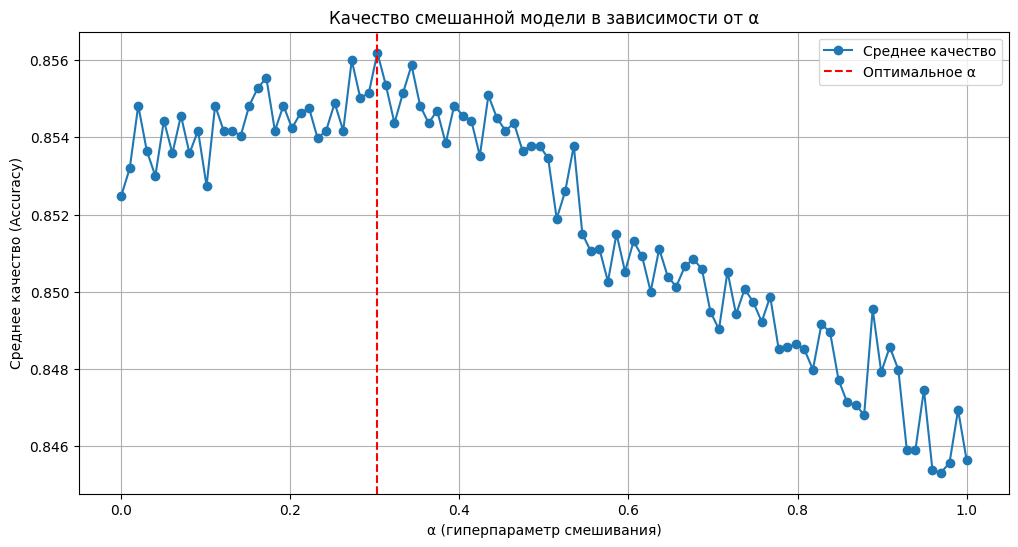

Оптимальное значение α: 0.30, Максимальное качество: 0.8562


In [11]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
from sklearn.model_selection import KFold, cross_val_score  # Импортируем классы для кросс-валидации
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Импортируем RandomForest и GradientBoosting
from sklearn.linear_model import SGDClassifier  # Импортируем стохастический градиентный классификатор
from sklearn.base import BaseEstimator, ClassifierMixin  # Импортируем базовые классы для создания нового классификатора
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации данных

optimal_n_estimators = 96

# Загрузка данных
data = pd.read_csv('data.adult.csv')

# Замена символа "?" на NaN для удобства работы с пропусками
data.replace("?", pd.NA, inplace=True)

# Удаляем строки, где есть хотя бы одно NaN значение
data_cleaned = data.dropna()

# Выделение целевой переменной
target = data_cleaned['>50K,<=50K']  # Сохраняем целевую переменную
data_cleaned = data_cleaned.drop(columns=['>50K,<=50K'])  # Удаляем целевую переменную из основного датасета

# Преобразование целевой переменной в бинарный формат
target = target.map({'>50K': 1, '<=50K': 0})  # Преобразуем целевую переменную в бинарный формат

# Преобразование категориальных признаков с помощью One-Hot Encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)  # Преобразуем категориальные признаки

# Масштабирование вещественных признаков
scaler = StandardScaler()  # Создаем объект StandardScaler
X_scaled = scaler.fit_transform(data_encoded.values)  # Масштабируем признаки

# Обучение двух лучших моделей (по результатам предыдущих заданий)
clf1 = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=100)  # Используем ранее найденное оптимальное количество деревьев
clf2 = GradientBoostingClassifier(criterion='squared_error', max_features='log2', n_estimators=100)  # Используем ранее найденное оптимальное количество деревьев

# Обучаем модели на данных
clf1.fit(X_scaled, target)
clf2.fit(X_scaled, target)

# Создание нового классификатора на основе предсказаний clf1 и clf2
class BlendedClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1, clf2, alpha=0.5):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha

    def fit(self, X, y):
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        self.classes_ = np.unique(y)  # Добавляем атрибут classes_
        return self

    def predict(self, X):
        pred1 = self.clf1.predict_proba(X)[:, 1]  # Вероятности положительного класса для clf1
        pred2 = self.clf2.predict_proba(X)[:, 1]  # Вероятности положительного класса для clf2
        blended_pred = (pred1 * self.alpha + pred2 * (1 - self.alpha)) >= 0.5  # Комбинируем предсказания
        return blended_pred.astype(int)  # Возвращаем бинарные предсказания

# Подбор гиперпараметра alpha по сетке от 0 до 1
alphas = np.linspace(0, 1, num=100)  # Генерируем значения alpha от 0 до 1
scores = []  # Список для хранения результатов

for alpha in alphas:
    blended_model = BlendedClassifier(clf1=clf1, clf2=clf2, alpha=alpha)  # Создаем новый классификатор с текущим alpha
    score = cross_val_score(blended_model, X_scaled, target, cv=KFold(n_splits=5), scoring='accuracy').mean()  # Оцениваем качество модели
    scores.append(score)  # Сохраняем среднее качество

# Построение графика качества в зависимости от alpha
plt.figure(figsize=(12, 6))
plt.plot(alphas, scores, marker='o', label='Среднее качество')
plt.title('Качество смешанной модели в зависимости от α')
plt.xlabel('α (гиперпараметр смешивания)')
plt.ylabel('Среднее качество (Accuracy)')
plt.axvline(x=alphas[np.argmax(scores)], color='r', linestyle='--', label='Оптимальное α')  # Линия оптимального alpha
plt.legend()
plt.grid()
plt.show()

# Выводим максимальное качество и соответствующее значение alpha
optimal_alpha_index = np.argmax(scores)
print(f'Оптимальное значение α: {alphas[optimal_alpha_index]:.2f}, Максимальное качество: {scores[optimal_alpha_index]:.4f}')


## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**Задание 13 (1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберите тот, которых давал наилучшее качество на кросс-валидации (с учетом подобранных гиперпараметров) и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

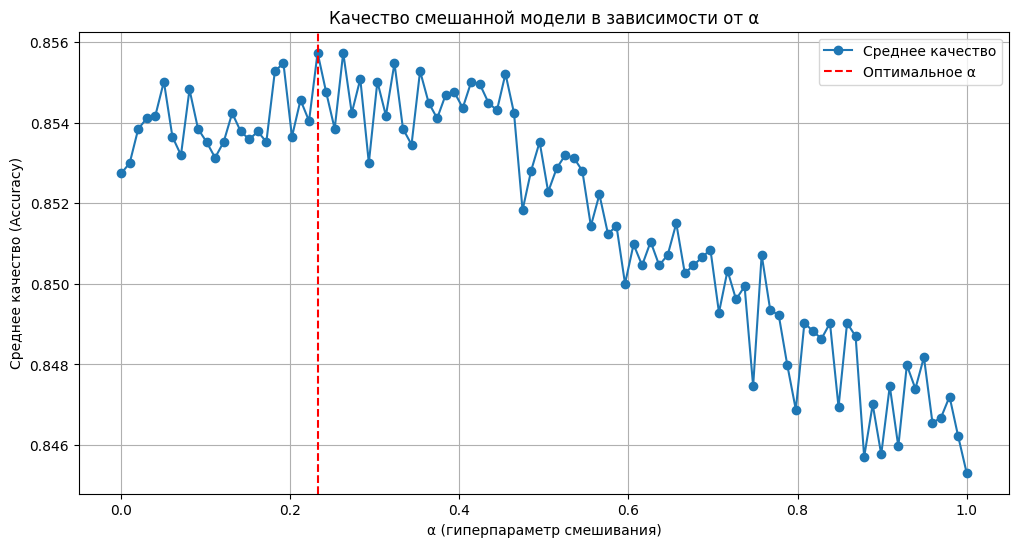

Оптимальное значение α: 0.23, Максимальное качество: 0.8557


In [15]:
import pandas as pd  # Импортируем библиотеку Pandas для работы с данными
import numpy as np  # Импортируем библиотеку NumPy для работы с массивами
import matplotlib.pyplot as plt  # Импортируем Matplotlib для визуализации данных
import seaborn as sns  # Импортируем Seaborn для улучшенной визуализации

# Загрузка данных
data = pd.read_csv('data.adult.csv')

# Замена символа "?" на NaN для удобства работы с пропусками
data.replace("?", pd.NA, inplace=True)

# Удаляем строки, где есть хотя бы одно NaN значение
data_cleaned = data.dropna()

# Выделение целевой переменной
target = data_cleaned['>50K,<=50K']  # Сохраняем целевую переменную
data_cleaned = data_cleaned.drop(columns=['>50K,<=50K'])  # Удаляем целевую переменную из основного датасета

# Преобразование целевой переменной в бинарный формат
target = target.map({'>50K': 1, '<=50K': 0})  # Преобразуем целевую переменную в бинарный формат

# Преобразование категориальных признаков с помощью One-Hot Encoding
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)  # Преобразуем категориальные признаки

# Масштабирование вещественных признаков
scaler = StandardScaler()  # Создаем объект StandardScaler
X_scaled = scaler.fit_transform(data_encoded.values)  # Масштабируем признаки

# Обучение двух лучших моделей (по результатам предыдущих заданий)
clf1 = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=100)  # Используем ранее найденное оптимальное количество деревьев
clf2 = GradientBoostingClassifier(criterion='squared_error', max_features='log2', n_estimators=100)  # Используем ранее найденное оптимальное количество деревьев

# Обучаем модели на данных
clf1.fit(X_scaled, target)
clf2.fit(X_scaled, target)

# Создание нового классификатора на основе предсказаний clf1 и clf2
class BlendedClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1, clf2, alpha=0.5):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha

    def fit(self, X, y):
        self.clf1.fit(X, y)
        self.clf2.fit(X, y)
        self.classes_ = np.unique(y)  # Добавляем атрибут classes_
        return self

    def predict(self, X):
        pred1 = self.clf1.predict_proba(X)[:, 1]  # Вероятности положительного класса для clf1
        pred2 = self.clf2.predict_proba(X)[:, 1]  # Вероятности положительного класса для clf2
        blended_pred = (pred1 * self.alpha + pred2 * (1 - self.alpha)) >= 0.5  # Комбинируем предсказания
        return blended_pred.astype(int)  # Возвращаем бинарные предсказания

# Подбор гиперпараметра alpha по сетке от 0 до 1
alphas = np.linspace(0, 1, num=100)  # Генерируем значения alpha от 0 до 1
scores = []  # Список для хранения результатов

for alpha in alphas:
    blended_model = BlendedClassifier(clf1=clf1, clf2=clf2, alpha=alpha)  # Создаем новый классификатор с текущим alpha
    score = cross_val_score(blended_model, X_scaled, target, cv=KFold(n_splits=5), scoring='accuracy').mean()  # Оцениваем качество модели
    scores.append(score)  # Сохраняем среднее качество

# Построение графика качества в зависимости от alpha
plt.figure(figsize=(12, 6))
plt.plot(alphas, scores, marker='o', label='Среднее качество')
plt.title('Качество смешанной модели в зависимости от α')
plt.xlabel('α (гиперпараметр смешивания)')
plt.ylabel('Среднее качество (Accuracy)')
plt.axvline(x=alphas[np.argmax(scores)], color='r', linestyle='--', label='Оптимальное α')  # Линия оптимального alpha
plt.legend()
plt.grid()
plt.show()

# Выводим максимальное качество и соответствующее значение alpha
optimal_alpha_index = np.argmax(scores)
print(f'Оптимальное значение α: {alphas[optimal_alpha_index]:.2f}, Максимальное качество: {scores[optimal_alpha_index]:.4f}')
